In [10]:
from ddlpy.waterinfo import waterinfo_read
import matplotlib.pyplot as plt
import os

In [11]:
# example in May, during DST
folder = r'..\tests'
f = os.path.join(folder,'20200608_069_20200507.csv')
g = os.path.join(folder,'NVT_WATHTE_SCHE_20200507.csv')

# file via email request: always CET wintertime: UTC + 1

In [3]:
dxf = waterinfo_read(f)
# dxf is an xarray. xarrays can carry ALL meta-data.
dxf[0]

144  rows for variable:  WATHTBRKD
144  rows for variable:  WATHTE


<xarray.Dataset>
Dimensions:  (time: 144)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-06T23:00:00 ... 2020-05-07T22:50:00
Data variables:
    data     (time) float64 -54.0 -51.0 -46.0 -39.0 ... -69.0 -67.0 -65.0 -62.0
Attributes:
    file.name:               ..\tests\20200608_069_20200507.csv
    file.encoding:           latin
    file.original_columns:   Index(['MONSTER_IDENTIFICATIE', 'MEETPUNT_IDENTI...
    file.original_timezone:  1

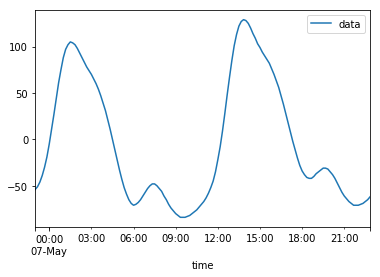

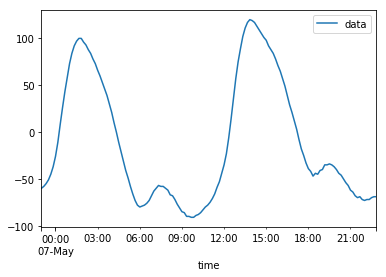

In [4]:
# xarray can be mapped to pandas dataframe. NB all meta-data gets lost.
df0 = dxf[0].to_dataframe()
df1 = dxf[1].to_dataframe()
df0.plot()
df1.plot()

# file direct download: CET, with DST in summer: UCT+1 or UTC+2

144  rows for variable:  Waterhoogte Oppervlaktewater t.o.v. Normaal Amsterdams Peil in cm


<xarray.Dataset>
Dimensions:  (time: 144)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-06T22:00:00 ... 2020-05-07T21:50:00
Data variables:
    data     (time) int64 -69 -68 -67 -65 -63 -62 ... -62 -64 -68 -70 -69 -72
Attributes:
    file.name:               ..\tests\NVT_WATHTE_SCHE_20200507.csv
    file.encoding:           latin
    file.original_columns:   Index(['Datum', 'Tijd', 'Parameter', 'Locatie', ...
    file.original_timezone:  CET

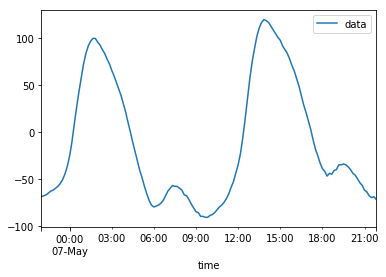

In [5]:
# dxg is an xarray. xarrays can carry ALL meta-data.
dxg = waterinfo_read(g)
# xarray can be mapped to pandas dataframe. NB all meta-data gets lost.
dg = dxg.to_dataframe()
dg.plot()
dxg

# cross check two files: timezone correction

In [6]:
df0['2020-05-07 12:00:00':'2020-05-07 12:40:00'] - df1['2020-05-07 12:00:00':'2020-05-07 12:40:00']

,data
time,
2020-05-07 12:00:00,13.0
2020-05-07 12:10:00,15.0
2020-05-07 12:20:00,15.0
2020-05-07 12:30:00,14.0
2020-05-07 12:40:00,12.0


In [7]:
# should be 0s
df0['2020-05-07 12:00:00':'2020-05-07 12:40:00'] - dg['2020-05-07 12:00:00':'2020-05-07 12:40:00']

,data
time,
2020-05-07 12:00:00,13.0
2020-05-07 12:10:00,15.0
2020-05-07 12:20:00,15.0
2020-05-07 12:30:00,14.0
2020-05-07 12:40:00,12.0


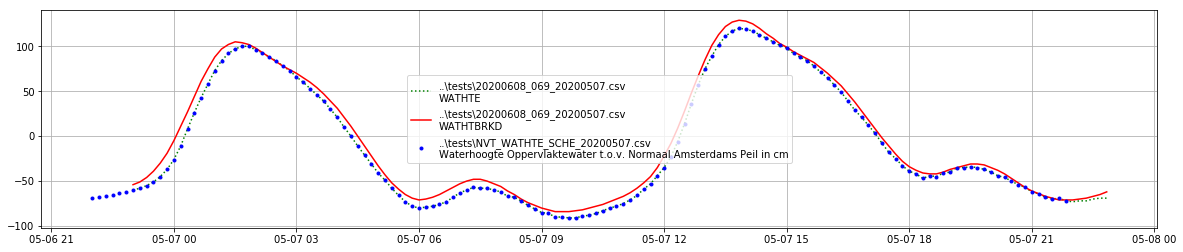

In [8]:
%matplotlib inline
fig=plt.figure()
fig.set_figwidth(20)
plt.plot(df1.index,df1['data'],'g:',label=dxf[1].attrs['file.name']+'\n'+dxf[1]['data'].attrs['GROOTHEID_ CODE'])
plt.plot(df0.index,df0['data'],'r-',label=dxf[0].attrs['file.name']+'\n'+dxf[0]['data'].attrs['GROOTHEID_ CODE'])
plt.plot(dg.index,dg['data']  ,'b.',label=   dxg.attrs['file.name']+'\n'+dxg['data'].attrs['Parameter'])
plt.legend()
plt.grid()

In [9]:
dxf[1].attrs['file.name']+dxf[1]['data'].attrs['GROOTHEID_ CODE']

'..\\tests\\20200608_069_20200507.csvWATHTE'